# Make Money with Machine Learning Course

## Second Week Homework Assignment

## Author: BV Pradeep

Refrences : 
1. https://nbviewer.jupyter.org/github/rayryeng/make-money-ml-course/blob/master/week2/Week_2_Make_Money_with_Machine_Learning_Homework.ipynb
2. https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
3. https://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso



#### Please download SecondHomeworkAssignment.ipynb and AAPL.csv file from the repository. Keep them in the same folder as I am using the Pandas CSV read function to load the data

In the following homework assignment for week 2 of Make money with Machine Learning Course, we need to predict stock price using scikit learn Library. I am using 5 different linear regression techniques to find the stock price, they are as follows

1. Ridge Regression
2. Lasso Regression
3. KNN Regression
4. Elastic Net Regression
5. Orthogonal Matching Pursuit

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Ridge,Lasso,ElasticNet,OrthogonalMatchingPursuit
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Read data from file 'filename.csv', 
dataframe = pd.read_csv("AAPL.csv")
dataframe.set_index('Date', inplace=True)
# Preview the first 5 lines of the loaded data
dataframe.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,228.410004,229.179993,226.630005,228.360001,224.870499,27390100
2018-09-05,228.990005,229.669998,225.100006,226.869995,223.403275,33333000
2018-09-06,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500


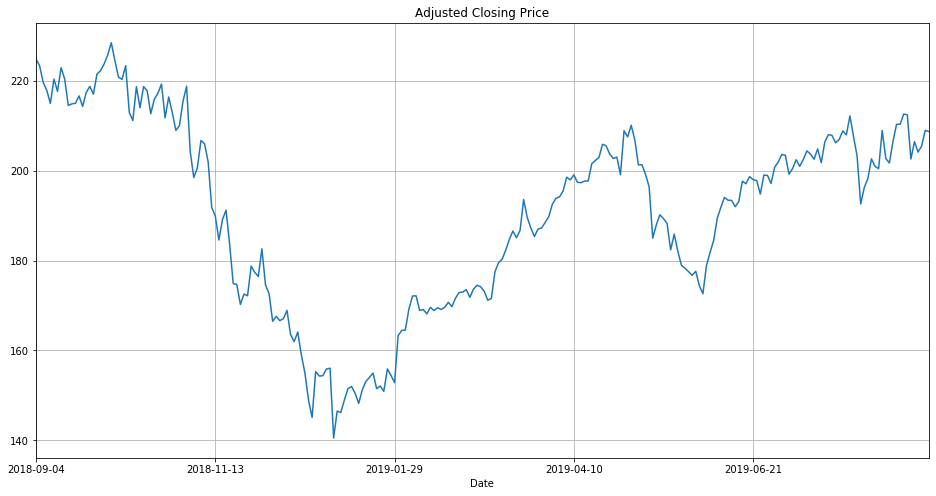

In [3]:
# Plotting the Adjusted Closing Price
dataframe['Adj Close'].plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [4]:
window_size = 32 # Allow us to look at 32 days into the past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(dataframe) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)



In [5]:
data = dataframe['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [6]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [7]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

## Ridge Regression Model

In [8]:
# Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

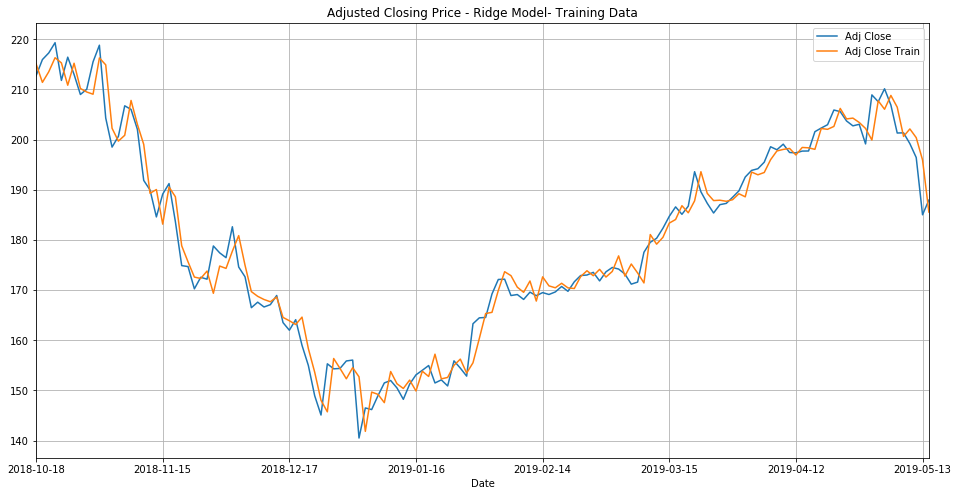

In [9]:
# Plot what it looks like for the training data
df_ridge = dataframe.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - Ridge Model- Training Data', grid=True)

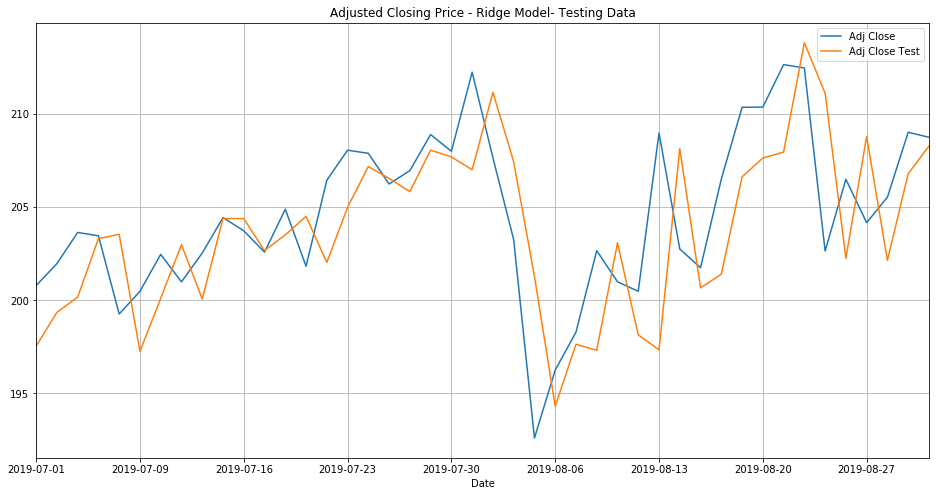

In [10]:
# Same for the test
df_ridge = dataframe.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - Ridge Model- Testing Data', grid=True)



## Lasso Regression Model

In [11]:
# Train
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Infer
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

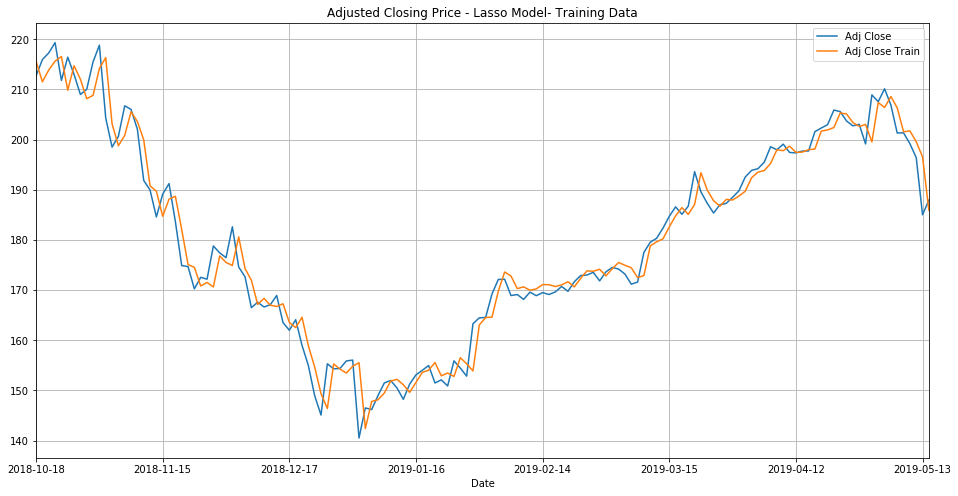

In [12]:
# Plot what it looks like for the training data
df_lasso = dataframe.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - Lasso Model- Training Data', grid=True)

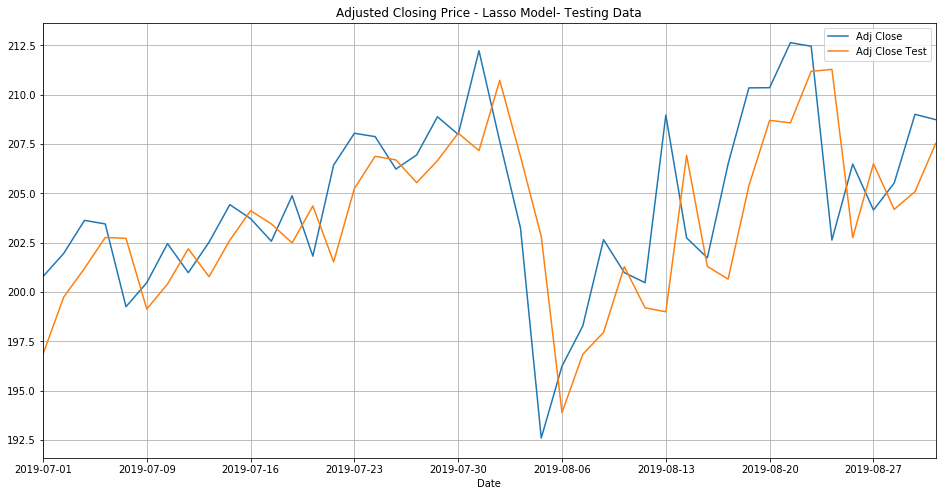

In [13]:
# Same for the test
df_lasso = dataframe.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_lasso['Adj Close Test'] = y_pred_lasso
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - Lasso Model- Testing Data', grid=True)

## Elastic Net Regression

In [14]:
# Train
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)

# Infer
y_pred_train_elastic_net = elastic_net_model.predict(X_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)

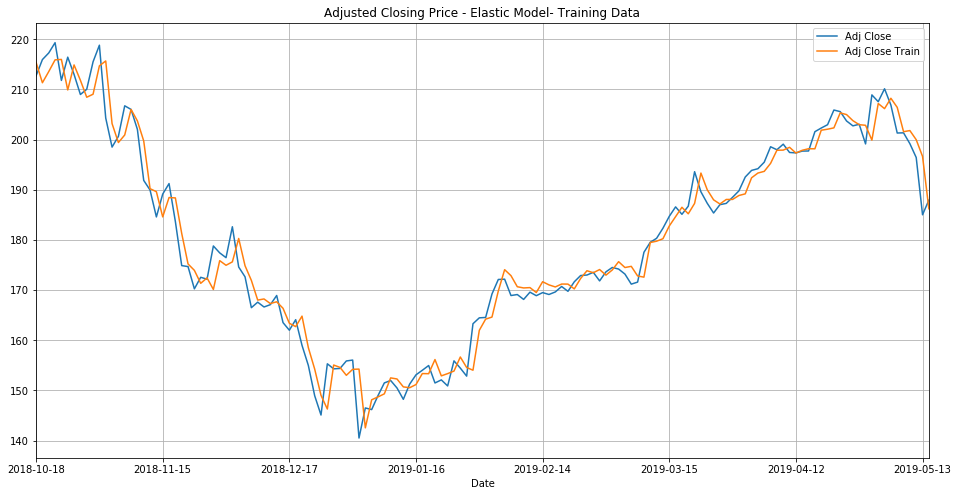

In [15]:
# Plot what it looks like for the training data
df_elastic_net = dataframe.copy()
df_elastic_net.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_elastic_net = df_elastic_net.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_elastic_net['Adj Close Train'] = y_pred_train_elastic_net[:-window_size]
df_elastic_net.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - Elastic Model- Training Data', grid=True)

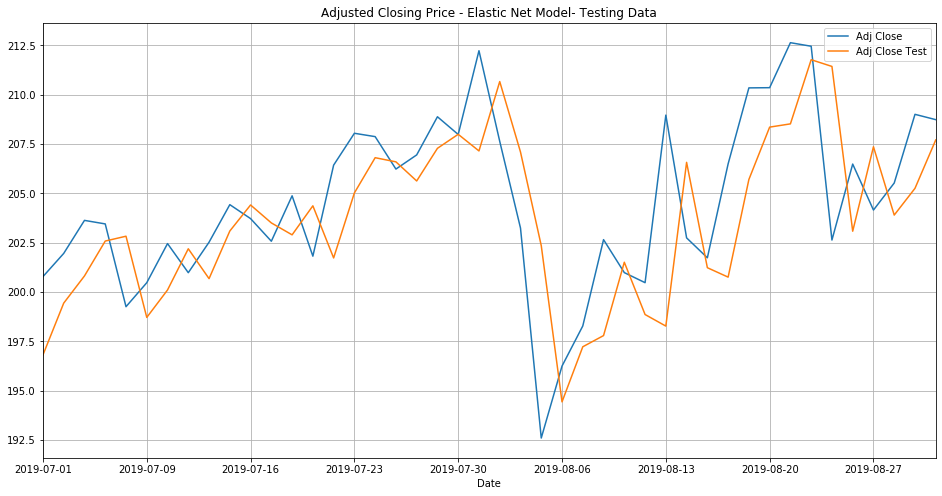

In [16]:
# Same for the test
df_elastic_net = dataframe.copy()
df_elastic_net.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_elastic_net = df_elastic_net.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_elastic_net['Adj Close Test'] = y_pred_elastic_net
df_elastic_net.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - Elastic Net Model- Testing Data', grid=True)

## Orthogonal Matching Pursuit

In [17]:
# Train
omp_model = OrthogonalMatchingPursuit()
omp_model.fit(X_train, y_train)

# Infer
y_pred_train_omp = omp_model.predict(X_train)
y_pred_omp = omp_model.predict(X_test)

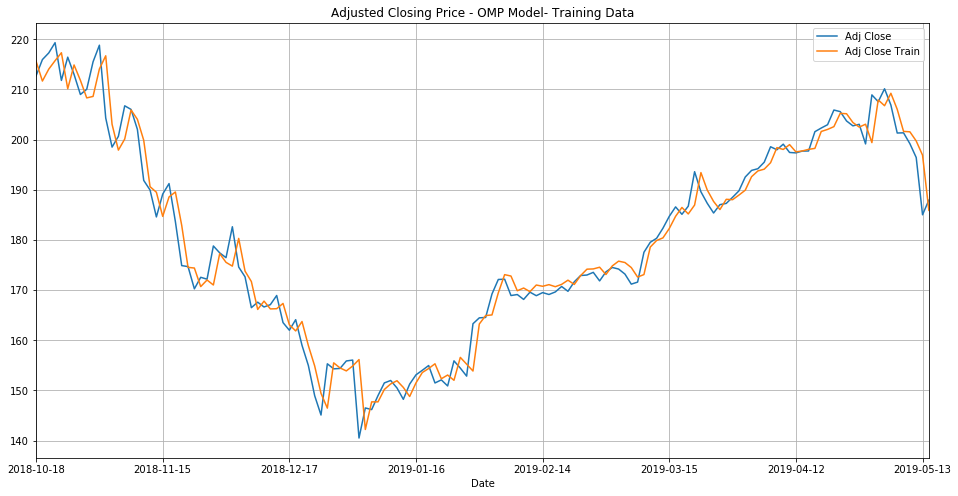

In [18]:
# Plot what it looks like for the training data
df_omp = dataframe.copy()
df_omp.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_omp = df_omp.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_omp['Adj Close Train'] = y_pred_train_omp[:-window_size]
df_omp.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - OMP Model- Training Data', grid=True)

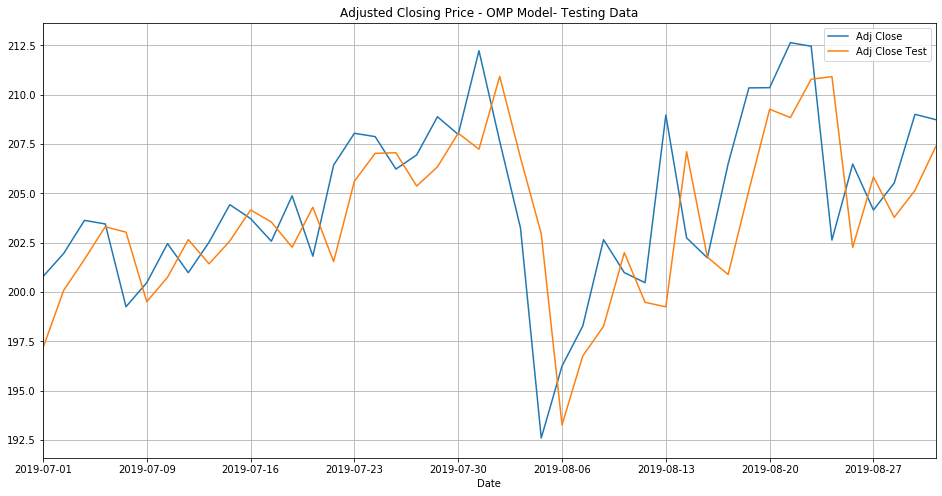

In [19]:
# Same for the test
df_omp = dataframe.copy()
df_omp.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_omp = df_omp.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_omp['Adj Close Test'] = y_pred_omp
df_omp.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - OMP Model- Testing Data', grid=True)

## KNN Regression

In [20]:
#Train
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

# Infer
y_pred_train_knn = knn_model.predict(X_train)
y_pred_knn = knn_model.predict(X_test)

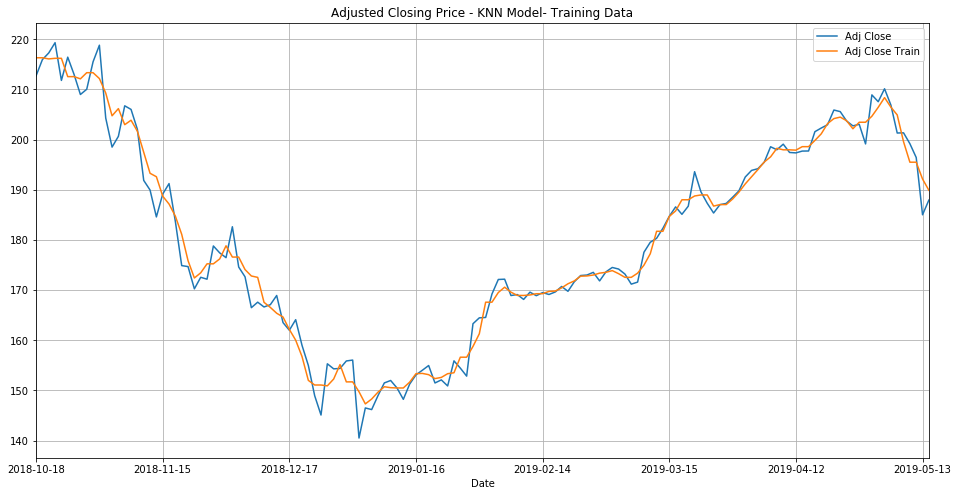

In [21]:
# Plot what it looks like for the training data
df_knn = dataframe.copy()
df_knn.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_knn = df_knn.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_knn['Adj Close Train'] = y_pred_train_knn[:-window_size]
df_knn.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - KNN Model- Training Data', grid=True)

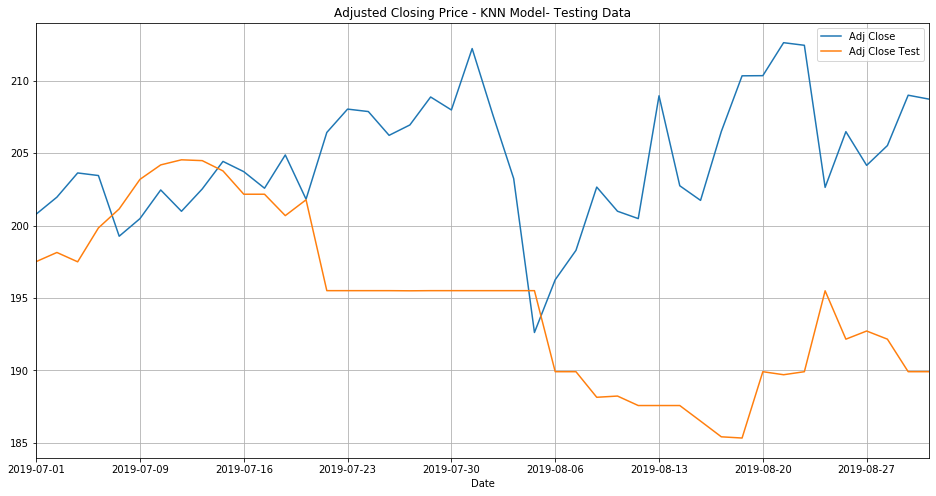

In [22]:
# Same for the test
df_knn = dataframe.copy()
df_knn.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_knn = df_knn.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_knn['Adj Close Test'] = y_pred_knn
df_knn.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - KNN Model- Testing Data', grid=True)

## Combining all the Models

### All Models Performace on Training Data

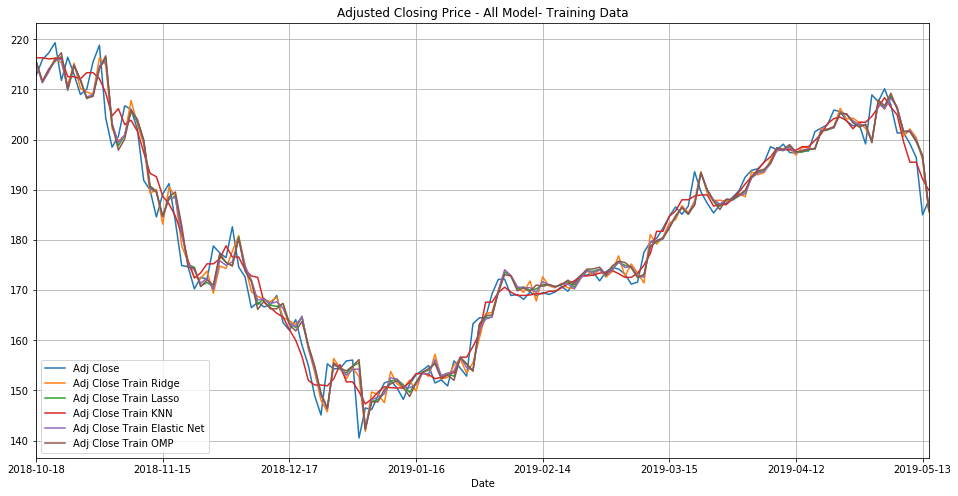

In [23]:
df_train = dataframe.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:ind_split] # Past 32 days we don't know yet
# Add in all of our methods
df_train['Adj Close Train Ridge'] = y_pred_train_ridge[:-window_size]
df_train['Adj Close Train Lasso'] = y_pred_train_lasso[:-window_size]
df_train['Adj Close Train KNN'] = y_pred_train_knn[:-window_size]
df_train['Adj Close Train Elastic Net'] = y_pred_train_elastic_net[:-window_size]
df_train['Adj Close Train OMP'] = y_pred_train_omp[:-window_size]
# Plot the data now
df_train.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - All Model- Training Data', grid=True)

### All Models performance on Testing Data

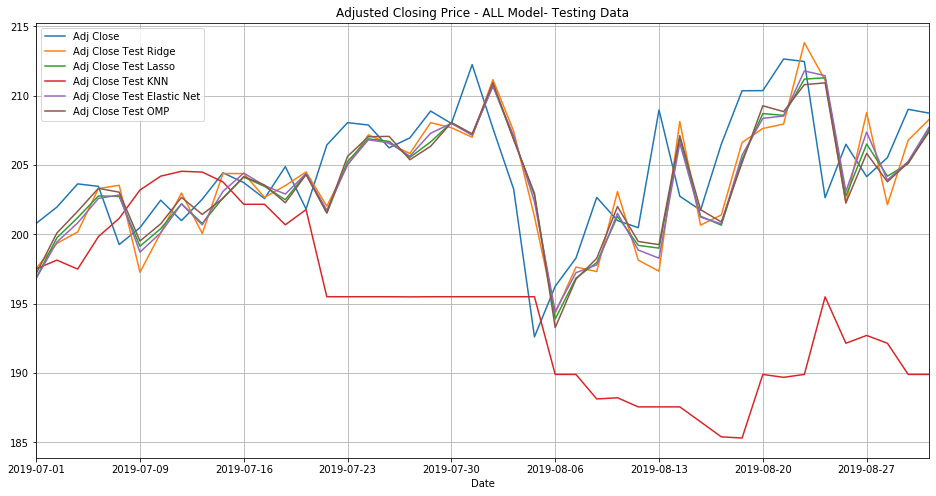

In [24]:
df_test = dataframe.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] # Past 32 days we don't know yet
# Add in all of our methods
df_test['Adj Close Test Ridge'] = y_pred_ridge
df_test['Adj Close Test Lasso'] = y_pred_lasso
df_test['Adj Close Test KNN'] = y_pred_knn
df_test['Adj Close Test Elastic Net'] = y_pred_elastic_net
df_test['Adj Close Test OMP'] = y_pred_omp
# Plot the data now
df_test.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price - ALL Model- Testing Data', grid=True)

## Forecasting Stock Prices for Next 20 days using all Models

In [25]:
num_days = 20 # Let's try and forecase the next 10 days or two years

# Get the last window_size (32) days
data_seed = dataframe['Adj Close'].values[-window_size:][None]
input_values = {"ridge": data_seed, "lasso": data_seed, "knn": data_seed,"elasticnet":data_seed,"omp":data_seed}
values = {"ridge": [], "lasso": [], "knn": [],"elasticnet":[],"omp":[]}

for i in range(num_days):
    values["ridge"].append(ridge_model.predict(input_values["ridge"])[0])
    values["lasso"].append(lasso_model.predict(input_values["lasso"])[0])
    values["knn"].append(knn_model.predict(input_values["knn"])[0])
    values["elasticnet"].append(elastic_net_model.predict(input_values["elasticnet"])[0])
    values["omp"].append(omp_model.predict(input_values["omp"])[0])
    for v in input_values:
        val = input_values[v]
        val = np.insert(val, -1, values[v][-1], axis=1)
        val = np.delete(val, 0, axis=1)
        input_values[v] = val.copy()

# Convert all to NumPy arrays
for v in input_values:
    values[v] = np.array(values[v])

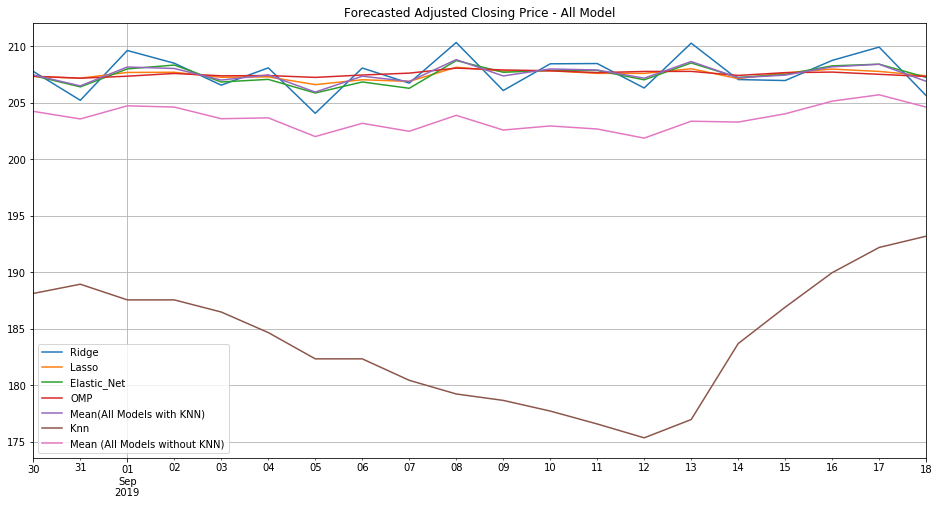

In [26]:
from datetime import timedelta, datetime
last_date = datetime.strptime(dataframe.index[-1], '%Y-%m-%d')

df_forecast = pd.DataFrame()
df_forecast["Ridge"] = values["ridge"]
df_forecast["Lasso"] = values["lasso"]
df_forecast["Elastic_Net"] = values["elasticnet"]
df_forecast["OMP"] = values["omp"]
df_forecast['Mean(All Models with KNN)'] = df_forecast.mean(axis=1)
df_forecast["Knn"] = values["knn"]
df_forecast['Mean (All Models without KNN)'] = df_forecast.mean(axis=1)
df_forecast.index = pd.date_range(start=last_date, periods=num_days)
df_forecast.plot(label='AAPL', figsize=(16,8), title='Forecasted Adjusted Closing Price - All Model', grid=True)

In [27]:
df_forecast

,Ridge,Lasso,Elastic_Net,OMP,Mean(All Models with KNN),Knn,Mean (All Models without KNN)
2019-08-30,207.785820,207.335750,207.419143,207.364949,207.476415,188.130211,204.252048
2019-08-31,205.231838,207.190270,206.419456,207.188731,206.507574,188.947106,203.580829
2019-09-01,209.641833,207.698634,208.012831,207.364990,208.179572,187.559875,204.742956
2019-09-02,208.513438,207.713933,208.350834,207.608832,208.046759,187.559876,204.632279
2019-09-03,206.572339,207.269321,206.854569,207.398899,207.023782,186.483963,203.600479
2019-09-04,208.103735,207.304998,207.083600,207.422400,207.478684,184.665871,203.676548
2019-09-05,204.078754,206.617302,205.876784,207.259417,205.958064,182.339710,202.021672
2019-09-06,208.087696,207.051446,206.854349,207.469975,207.365866,182.339710,203.194840
2019-09-07,206.751018,206.904763,206.295784,207.636535,206.897025,180.439430,202.487426
2019-09-08,210.350155,208.153711,208.749460,208.081747,208.833768,179.229030,203.899645


Among all the Models KNN is performance seems to very bad.